<a href="https://colab.research.google.com/github/gabriellbragaa/Computer_Vision_Projs/blob/main/Lab04resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**01) Aplique a transformada de Hough para linhas e
círculos (verifique a documentação do OpenCV) de modo a localizar as placas presentes nas
imagens. Produza uma imagem diferente para cada um dos três modelos de placa.**

Em visão computacional, utilizamos a **transformada de Hough** para encontrar padrões em imagens, mesmo que imcompletas ou com ruídos. Ele detectar formas geométricas em imagens, como linhas, circulos..



Nessa atividade, temos como objetivo: **Localizar placas de carros**. Dependendo do design da placa, a transformada pode identificar.


Utlizamos o **Algoritmo de Canny** para detectar bordas, no qual usamos as métricas de **Threshold de histerese**, no qual serve para refinar as bordas detectadas e evitar que bordas fracas sejam perdidas ou ruídos sejam erraneamente interpretado como borda.

- Pixers com gradiente acima de 150 são bordas definitivas. E pixers com gradiente entre 50 e 150 serão mantidos apenas se estiverem mantidos a pixels de bordas forte. Pixers com gradiente abaixo de 50 serão descatados.

No algoritmo abaixo, adicionei o filtro **sobel** para a identificação somente dos circulos. Já na identificação das linhas, achei mais evidente o uso somente do modelo **Canny**. Mas ambos obtiveram resultados analogos, tanto o **sobel** tanto identificar as linhas, como o **Canny** para identificar os circulos.

Saving placas-transito.jpg to placas-transito (22).jpg


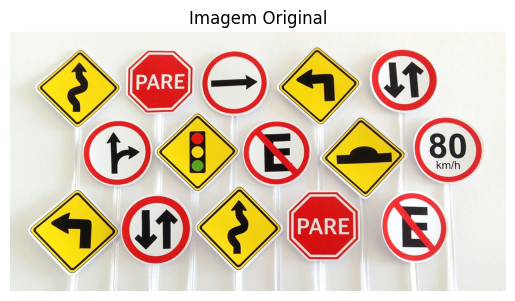

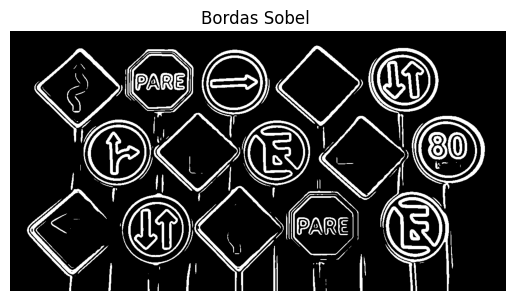

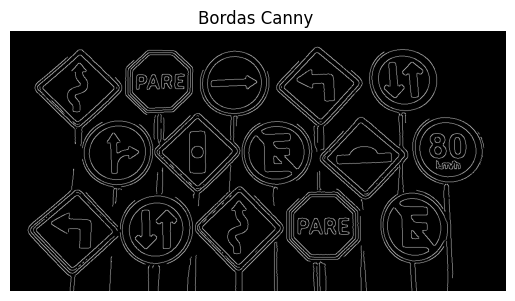

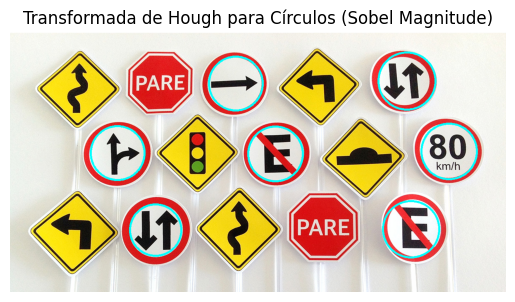

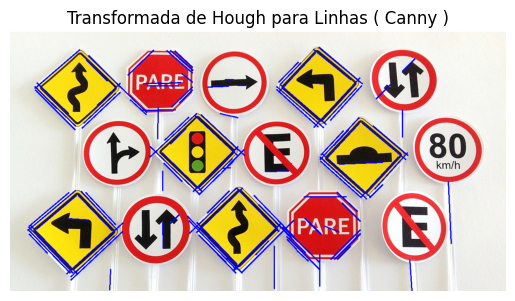

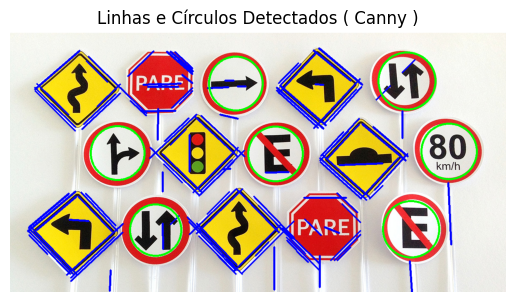

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

img = cv2.imread(filename)

if img is None:
    print("Erro ao carregar a imagem.")
else:

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.axis('off')
    plt.show()

    # Converter para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_equalized = cv2.equalizeHist(gray)
    gray_blurred = cv2.GaussianBlur(gray_equalized, (15, 15), 0)


    # --- Aplicar o detector de bordas Sobel ---
    # Calcular os gradientes Sobel nas direções x e y
    sobelx = cv2.Sobel(gray_blurred, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray_blurred, cv2.CV_64F, 0, 1, ksize=5)

    # Calcular a magnitude do gradiente
    sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalizar a magnitude para exibir
    sobel_magnitude_normalized = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Aplicar um threshold na magnitude para obter bordas binárias (opcional, mas comum para visualização)

    sobel_threshold_value = 80 # Ajuste conforme necessário

    ret, sobel_edges = cv2.threshold(sobel_magnitude_normalized, sobel_threshold_value, 255, cv2.THRESH_BINARY)
    # ------------------------------------------

    # --- Visualizar as bordas Sobel ---
    plt.imshow(sobel_edges, cmap='gray')
    plt.title(f'Bordas Sobel ')
    plt.axis('off')
    plt.show()
    # ----------------------------------


    # --- Aplicar o detector de bordas Canny ---

    # Defina os thresholds de histerese
    canny_threshold1 = 50
    canny_threshold2 = 100
    canny_edges = cv2.Canny(gray_blurred, canny_threshold1, canny_threshold2)
    # ------------------------------------------

    # --- Visualizar as bordas Canny ---
    plt.imshow(canny_edges, cmap='gray')
    plt.title(f'Bordas Canny ')
    plt.axis('off')
    plt.show()
    # ----------------------------------

    # Parâmetros da Transformada de Hough
    # Aplicandas com canny

    minLineLength = 20
    # numero minimo de pontos a serem identificadas numa linha
    maxLineGap = 10
    # tamanho da reta

    # --- Aplicar a Transformada de Hough para linhas usando as bordas Canny ---
    lines = cv2.HoughLinesP(canny_edges, 1, np.pi/180, 100, minLineLength=minLineLength, maxLineGap = maxLineGap )
    # ----------------------------------------------------------------------


    # Aplicando sobel


    circles = cv2.HoughCircles(sobel_magnitude_normalized, cv2.HOUGH_GRADIENT, 1, 150,
                               param1=80, param2=60, minRadius=50, maxRadius=70)

    # com sobel
    img_circulos_sobel = img.copy()


    # com canny
    img_linhas = img.copy()
    img_combinada_canny_sobel = img.copy()


    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img_linhas, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.line(img_combinada_canny_sobel, (x1, y1), (x2, y2), (255, 0, 0), 3) # Blue lines

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img_circulos_sobel, (i[0], i[1]), i[2], (255, 255, 0), 3)
            cv2.circle(img_combinada_canny_sobel, (i[0], i[1]), i[2], (0, 255, 0), 3) # Green circles


     # Exibir as imagens geradas com Sobel


    plt.imshow(cv2.cvtColor(img_circulos_sobel, cv2.COLOR_BGR2RGB))
    plt.title('Transformada de Hough para Círculos (Sobel Magnitude)')
    plt.axis('off')
    plt.show()


    # Exibir as imagens geradas com Canny
    plt.imshow(cv2.cvtColor(img_linhas, cv2.COLOR_BGR2RGB))
    plt.title('Transformada de Hough para Linhas ( Canny )')
    plt.axis('off')
    plt.show()

    plt.imshow(cv2.cvtColor(img_combinada_canny_sobel, cv2.COLOR_BGR2RGB))
    plt.title('Linhas e Círculos Detectados ( Canny )')
    plt.axis('off')
    plt.show()